# MOwNiT 
## Laboratorium
### Znajdowanie pierwiastków

Do poszukiwania pierwiastków funkcji w Julii używamy pakietu Roots

```julia
Pkg.add("Roots")
Pkg.add("ForwardDiff")
```

In [ ]:
using Pkg
#Pkg.add("Roots")
#Pkg.add("ForwardDiff")

In [ ]:
using Roots  
using Plots
using ForwardDiff

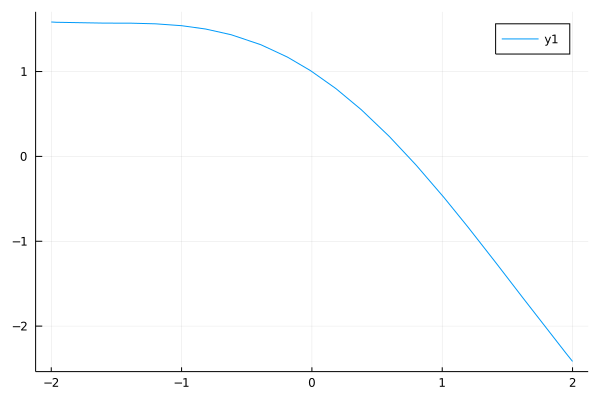

In [51]:
# przykładowa funkcja do testów
f(x) = cos(x) - x
plot(f, -2, 2)

Funkcja <i> find_zero</i>  dobiera odpowiedni algorytm w zależności od sposobu wywołania.


### 1. Metody wykorzytujące  przedział i zmianę znaku

#### 1.1 Metoda bisekcji - jesli wywołamy fzero z podaniem  przedziału (tutaj (0,1))

In [52]:
x = find_zero(f, (0, 1),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151609
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.5004882812500000,  1.0000000000000000)
(a_11, b_11) = ( 0.5004882812500000,  0.7502441406250000)
(a_12, b_12) = ( 0.6253662109375000,  

0.7390851332151607

In [53]:
# mozna wyspecyfikowac wprost
x = find_zero(f, (0, 1), Bisection(),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151609
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.5004882812500000,  1.0000000000000000)
(a_11, b_11) = ( 0.5004882812500000,  0.7502441406250000)
(a_12, b_12) = ( 0.6253662109375000,  

0.7390851332151607

#### Sprawdzanie, czy znaleźliśmy 0

In [54]:
#Sprawdzamy czy znaleźliśmy 0
iszero(f(x))

true

In [55]:
# można też sprawdzić, czy funkcja zmienia znak dla lewego i prawego sąsiada miejsca zerowego.
sign(f(prevfloat(x))) * sign(f(nextfloat(x))) 

-1.0

In [56]:
# czasem algorytm znajduje najlepsze przybliżenie 0
g(x) = sin(x)
x = find_zero(g, (pi/2, 3pi/2))
x, g(x)

(3.1415926535897936, -3.216245299353273e-16)

In [57]:
# nie jest to dokładnie 0, ale ...
iszero(g(x))

false

In [58]:
#... najbliższy lewy albo prawy sąsiad leży po przeciwnej stronie osi x  niż nasze 0.
g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0

true

#### 1.2 Metoda regula falsi

In [59]:
find_zero(f, (0, 1), FalsePosition(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 6
* function evaluations: 8
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 1.0000000000000000,  0.6850733573260451)
(a_2, b_2) = ( 1.0000000000000000,  0.7362989976136540)
(a_3, b_3) = ( 0.7362989976136540,  0.7390895164441823)
(a_4, b_4) = ( 0.7390895164441823,  0.7390851305146882)
(a_5, b_5) = ( 0.7390895164441823,  0.7390851332151580)
(a_6, b_6) = ( 0.7390895164441823,  0.7390851332151607)



0.7390851332151607

In [60]:
# do dyspozycji mamy  12 wersji algorytmu regula falsi
find_zero(f, (0, 1), FalsePosition(12), verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{12}()
* iterations: 6
* function evaluations: 8
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 1.0000000000000000,  0.6850733573260451)
(a_2, b_2) = ( 1.0000000000000000,  0.7362989976136540)
(a_3, b_3) = ( 0.7362989976136540,  0.7390895164441823)
(a_4, b_4) = ( 0.7390895164441823,  0.7390851305146882)
(a_5, b_5) = ( 0.7390895164441823,  0.7390851332151580)
(a_6, b_6) = ( 0.7390895164441823,  0.7390851332151607)



0.7390851332151607

### 2. Metody korzytające z pochodnych

#### 2.1 Metoda Newtona, potrzebuje punktu startowego i wykorzystuje pochodną funkcji.

Aby użyć Metody Newtona, można skorzystać z pakietu ForwardDiff, aby obliczyć pochodną funkcji. 

In [61]:
# definujemy D(f) obliczającą  funkcje pochodną 
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

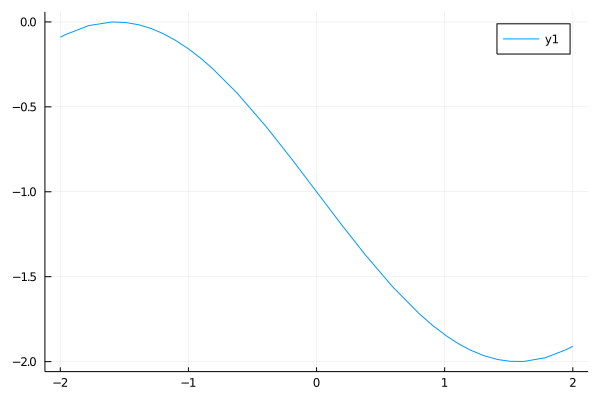

In [62]:
plot(D(f), -2,2)

In [63]:
#wywolanie metody Newtona
find_zero((f, D(f)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  1.0000000000000000,	 fx_1 = -0.4596976941318602
x_2 =  0.7503638678402439,	 fx_2 = -0.0189230738221174
x_3 =  0.7391128909113617,	 fx_3 = -0.0000464558989908
x_4 =  0.7390851333852840,	 fx_4 = -0.0000000002847206
x_5 =  0.7390851332151607,	 fx_5 =  0.0000000000000000



0.7390851332151607

#### 2.2 Metoda Halleya (potrzebuje pierwszej i drugiej pochodnej)

In [64]:
DD(f) = x->ForwardDiff.derivative(D(f), float(x))
find_zero((f, D(f), DD(f)), 0.0, Roots.Halley(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.6666666666666666,	 fx_1 =  0.1192205941102814
x_2 =  0.7390392624463102,	 fx_2 =  0.0000767690929604
x_3 =  0.7390851332151495,	 fx_3 =  0.0000000000000187
x_4 =  0.7390851332151606,	 fx_4 =  0.0000000000000001



0.7390851332151606

### 3. Metody korzystające z przybliżenia pochodnej

#### 3.1 Domyślna metoda bazuje na metodzie z <a href="http://www.hpl.hp.com/hpjournal/pdfs/IssuePDFs/1979-12.pdf"> kalkulatorów HP-34</a> , używa metody siecznych
oraz metody bazującej na przedziale wg artykułu:

<a href="http://na.math.kit.edu/alefeld/download/1995_Algorithm_748_Enclosing_Zeros_of_Continuous_Functions.pdf">G. E. Alefeld, F. A. Potra, and
Y. Shi, "Algorithm 748: enclosing zeros of continuous functions," ACM
Trans. Math. Softw. 21, 327–344 (1995), DOI: 10.1145/210089.210111. </a>

In [65]:
x = find_zero(f, 0,   verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851344824166
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 2
* function evaluations: 11
* Note: Exact zero found. Bracketing used over (0.0, 0.9999969722835389), those steps not shown. 

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000



0.7390851332151607

Metody find_zero dla wyzszych rzędów to wariacje metody Newtona, które nie korzystaja z pochodnej, ale ja przyblizają.


#### 3.2 Metoda siecznych

In [66]:
# wywołanie find_zero używając punktu startowego (a nie przedziału) 
# oraz opcji order=1   wykorzystuje metodę siecznych  
x = find_zero(f, 0, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Secant()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.9999969722835389,	 fx_1 = -0.4596921186823234
x_2 =  0.6850738998209052,	 fx_2 =  0.0892983907342113
x_3 =  0.7362990541607766,	 fx_3 =  0.0046599445167859
x_4 =  0.7391193608624661,	 fx_4 = -0.0000572842351875
x_5 =  0.7390851121285389,	 fx_5 =  0.0000000352908237
x_6 =  0.7390851332150014,	 fx_6 =  0.0000000000002666
x_7 =  0.7390851332151607,	 fx_7 =  0.0000000000000000



0.7390851332151607

In [67]:
# metoda siecznych może być wywołana bezpośrednio 
# implementacja taka sama jak find_zero(f, 0, Order1()), ale bez
# narzutów frameworku oraz mniejsza ilość sprawdzanych warunków zbieżności - szybsza
Roots.secant_method(f, 0)

0.7390851332151607

In [68]:
# mozemy podać przedział
Roots.secant_method(f, (0,1))

0.7390851332151607

#### 3.3 Metoda Steffensena 
przybliża pochodną poprzez  $$ \frac{(f(x + f(x)) - f(x))}{f(x)}  $$
aby ja wywołać podajemy punkt startowy oraz order 2

In [69]:
x = find_zero(f, 0, Order2(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order2()
* iterations: 6
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.9999969722835389,	 fx_1 = -0.4596921186823234
x_2 =  0.6850738998209052,	 fx_2 =  0.0892983907342113
x_3 =  0.7362990541607766,	 fx_3 =  0.0046599445167859
x_4 =  0.7391193608624661,	 fx_4 = -0.0000572842351875
x_5 =  0.7390851330409081,	 fx_5 =  0.0000000002916313
x_6 =  0.7390851332151607,	 fx_6 =  0.0000000000000000



0.7390851332151607

In [70]:
# mozliwe sa jeszcze rzędy 5, 8 i 16
x = find_zero(f, 0, Order8(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order8()
* iterations: 2
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.7369285852997423,	 fx_1 =  0.0036075047762146
x_2 =  0.7390851332151607,	 fx_2 =  0.0000000000000000



0.7390851332151607

Można użyć funkcji fzero do znajdowania nieciagłości

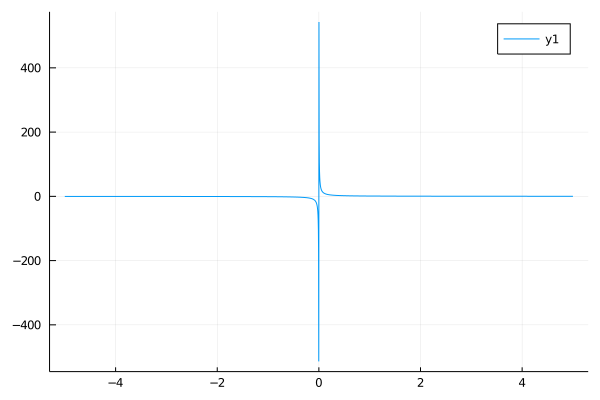

In [71]:
plot(x -> 1/x)

In [72]:
find_zero(x -> 1/x, (-1, 1), verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.BisectionExact()
* iterations: 61
* function evaluations: 63
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Change of sign at xn identified. 

Trace:
(a_0, b_0) = (-1.0000000000000000,  0.0000000000000000)
(a_1, b_1) = (-0.0000000000000000,  0.0000000000000000)
(a_2, b_2) = (-0.0000000000000000,  0.0000000000000000)
(a_3, b_3) = (-0.0000000000000000,  0.0000000000000000)
(a_4, b_4) = (-0.0000000000000000,  0.0000000000000000)
(a_5, b_5) = (-0.0000000000000000,  0.0000000000000000)
(a_6, b_6) = (-0.0000000000000000,  0.0000000000000000)
(a_7, b_7) = (-0.0000000000000000,  0.0000000000000000)
(a_8, b_8) = (-0.0000000000000000,  0.0000000000000000)
(a_9, b_9) = (-0.0000000000000000,  0.0000000000000000)
(a_10, b_10) = (-0.0000000000000000,  0.0000000000000000)
(a_11, b_11) = (-0.0000000000000000,  0.0000000000000000)
(a_12, b_12) = (-0.0000000000000000,  0.0000000000000000)
(a_13, b_13) = (-0.0000

0.0

find_zeros - szukanie więcej niż jednego pierwiastka. Wykorzystuje podział przedziału na mniejsze podprzedziały

In [73]:
find_zeros(x ->(x-3)*x, -10, 10)

2-element Array{Float64,1}:
 0.0
 3.0

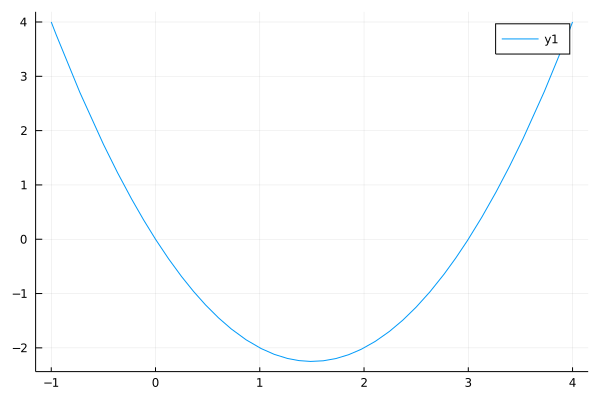

In [74]:
plot(x ->(x-3)*x,-1,4)

Więcej na https://github.com/JuliaMath/Roots.jl/blob/master/doc/roots.ipynb

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

### Zadanie A1

In [1]:
using Roots  
using Plots
using ForwardDiff
using SpecialFunctions
using DataFrames

In [49]:
f1(x) = x * exp(-x)
f2(x) = (x + 3) * (x - 1)^2.
f3(x) = cos(x) - x
f4(x) = sin( x ) - x / 2. 
f5(x) = 20.0 * x / ( 100.0 * x * x + 1.0 ) # the Repeller
f6(x) = 1.0 / ( ( x - 0.3 )^2 + 0.01 ) + 1.0 / ( ( x - 0.9 )^2 + 0.04 ) + 2.0 * x - 5.2 # the Camel
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

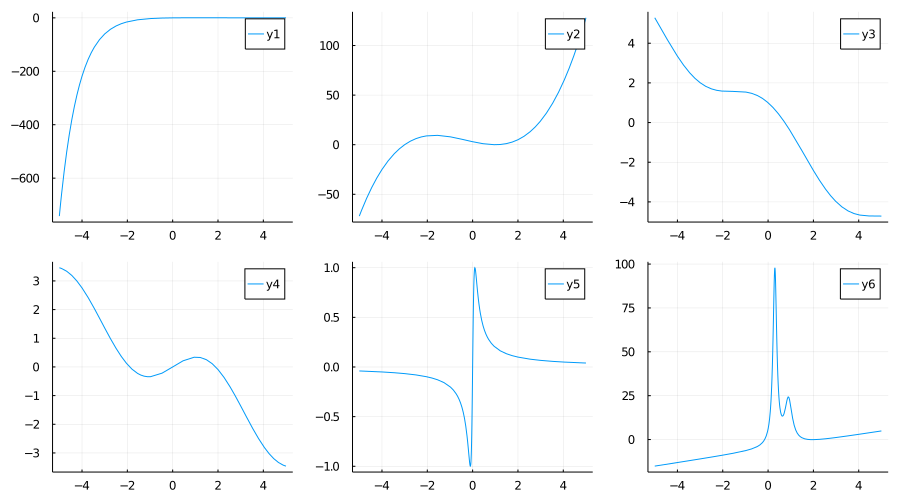

In [3]:
plot([f1,f2,f3,f4,f5,f6], layout = 6, size = (900,500))

Chosen methods:
1. Bisection
2. Newton
3. Steffensen's

In [4]:
df = DataFrame(x=Float64[], fx=Float64[], method=String[])
function test_find_zero(f, range, method)
    if method == Roots.Newton
        D(f) = x->ForwardDiff.derivative(f, float(x))
        x = find_zero((f, D(f)),0, Roots.Newton(),verbose=true)
        push!(df, (x, f(x), "Roots.Newton"))
    else
        x = find_zero(f, range, method(),verbose=true)
        push!(df, (x, f(x), string(method)))
    end
    println("x=",x)
    if !iszero(f(x))
        println("f(x)=", f(x))
    end
    return x
end

test_find_zero (generic function with 1 method)

In [5]:
                                            # iterations, evaluations
test_find_zero(f1, (-5, 5), Bisection)      # 0 , 3
test_find_zero(f2, (-5, 5), Bisection)      # 60,62
test_find_zero(f3, (-5, 5), Bisection)      # 61,63
test_find_zero(f4, (-5, 5), Bisection)      # 0 , 3 
test_find_zero(f5, (-5, 5), Bisection)      # 0 , 3
test_find_zero(f6, (-5, 5), Bisection)      # 62,64
test_find_zero(f1, (-5, 5), Roots.Newton)   # 0 , 1
test_find_zero(f2, (-5, 5), Roots.Newton)   # 26,53
test_find_zero(f3, (-5, 5), Roots.Newton)   # 5 ,11
test_find_zero(f4, (-5, 5), Roots.Newton)   # 0 , 1
test_find_zero(f5, (-5, 5), Roots.Newton)   # 0 , 1
test_find_zero(f6, (-5, 5), Roots.Newton)   # 6 ,13
test_find_zero(f1, (-5, 5), Order2)         # 30,59
test_find_zero(f2, (-5, 5), Order2)         # 16,20
test_find_zero(f3, (-5, 5), Order2)         # 6 ,10
test_find_zero(f4, (-5, 5), Order2)         # 1 , 3
test_find_zero(f5, (-5, 5), Order2)         # 1 , 3
test_find_zero(f6, (-5, 5), Order2)         # 8 ,13

Results of univariate zero finding:

* Converged to: 5.0
* Algorithm: Roots.BisectionExact()
* iterations: 0
* function evaluations: 3
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Exact zero found

Trace:
(a_0, b_0) = (-5.0000000000000000,  5.0000000000000000)

x=0.0
Results of univariate zero finding:

* Converged to: -2.999999999999999
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-5.0000000000000000,  0.0000000000000000)
(a_1, b_1) = (-5.0000000000000000, -0.0000000000000000)
(a_2, b_2) = (-5.0000000000000000, -0.0000000000000000)
(a_3, b_3) = (-5.0000000000000000, -0.0000000000000000)
(a_4, b_4) = (-5.0000000000000000, -0.0000000000000000)
(a_5, b_5) = (-5.0000000000000000, -0.0000000011277734)
(a_6, b_6) = (-5.0000000000000000, -0.0000751018524170)
(a_7, b_7) = (-5.0000000000000000, 

Results of univariate zero finding:

* Converged to: 5.0
* Algorithm: Roots.BisectionExact()
* iterations: 0
* function evaluations: 3
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Exact zero found

Trace:
(a_0, b_0) = (-5.0000000000000000,  5.0000000000000000)

x=0.0
Results of univariate zero finding:

* Converged to: -0.1534804948126991
* Algorithm: Roots.BisectionExact()
* iterations: 62
* function evaluations: 64
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Change of sign at xn identified. 

Trace:
(a_0, b_0) = (-5.0000000000000000,  0.0000000000000000)
(a_1, b_1) = (-5.0000000000000000, -0.0000000000000000)
(a_2, b_2) = (-5.0000000000000000, -0.0000000000000000)
(a_3, b_3) = (-5.0000000000000000, -0.0000000000000000)
(a_4, b_4) = (-5.0000000000000000, -0.0000000000000000)
(a_5, b_5) = (-5.0000000000000000, -0.0000000011277734)
(a_6, b_6) = (-5.0000000000000000, -0.0000751018524170)
(a_7, b_7) = (-5.0000000000000000, -0.0193786621093750)
(a_8, 

x=-3.0
Results of univariate zero finding:

* Converged to: 0.7390851332151605
* Algorithm: Order2()
* iterations: 6
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  5.0000000000000000,	 fx_0 = -4.7163378145367734
x_1 =  0.2836621854632266,	 fx_1 =  0.6763747448314348
x_2 =  0.8752034090547707,	 fx_2 = -0.2343626894493547
x_3 =  0.7229804006851227,	 fx_3 =  0.0268567617740476
x_4 =  0.7386309085365312,	 fx_4 =  0.0007601196315420
x_5 =  0.7390851025329594,	 fx_5 =  0.0000000513501006
x_6 =  0.7390851332151605,	 fx_6 =  0.0000000000000003

x=0.7390851332151605
f(x)=3.3306690738754696e-16
Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Order2()
* iterations: 1
* function evaluations: 3
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  5.0000000000000000,	 fx_0 = -3.4589242746631386
x_1 =  0.0000000000000000,	 fx_1 =  0.0000000000000000

x=0.0
Results of univariate zero 

2.1274329318603384

In [11]:
iterations = [0, 60, 61, 0, 0, 62,
            0, 26, 5, 0, 0, 6,
            30, 16, 6, 1, 1, 8]
df[!,"iterations"] = iterations

18-element Array{Int64,1}:
  0
 60
 61
  0
  0
 62
  0
 26
  5
  0
  0
  6
 30
 16
  6
  1
  1
  8

In [15]:
evaluations = [3, 62, 62, 3, 3, 64,
            1, 53, 11, 1, 1, 13,
            59, 20, 10, 3, 3, 13]
df[!,"evaluations"] = evaluations

18-element Array{Int64,1}:
  3
 62
 62
  3
  3
 64
  1
 53
 11
  1
  1
 13
 59
 20
 10
  3
  3
 13

In [16]:
df

,x,fx,method,iterations,evaluations
,Float64,Float64,String,Int64,Int64
1,0.0,0.0,Bisection,0,3
2,-3.0,0.0,Bisection,60,62
3,0.739085,0.0,Bisection,61,62
4,0.0,0.0,Bisection,0,3
5,0.0,0.0,Bisection,0,3
6,-0.15348,8.88178e-16,Bisection,62,64
7,0.0,0.0,Roots.Newton,0,1
8,1.0,4.56496e-16,Roots.Newton,26,53
9,0.739085,0.0,Roots.Newton,5,11


### Zadanie A2

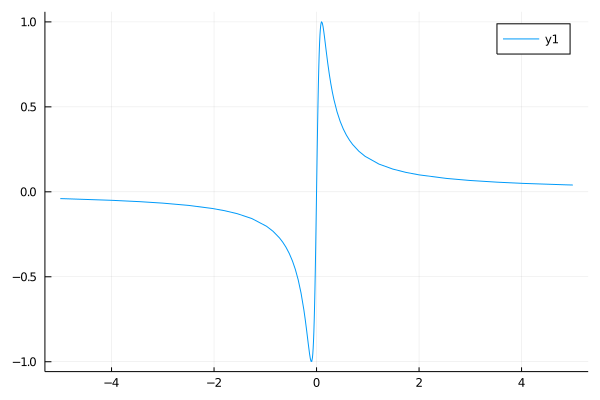

In [373]:
plot(f5)

In [10]:
find_zero(f5, (-100,1000), Bisection(),verbose=true)

Results of univariate zero finding:

* Converged to: 1000.0
* Algorithm: Roots.BisectionExact()
* iterations: 0
* function evaluations: 3
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Exact zero found

Trace:
(a_0, b_0) = (-100.0000000000000000,  1000.0000000000000000)



0.0

In [50]:
find_zero((f5, D(f5)), 0.5, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 1.7692082742525242e7
* Algorithm: Roots.Newton()
* iterations: 25
* function evaluations: 51
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.5000000000000000,	 fx_0 =  0.3846153846153846
x_1 =  1.0416666666666667,	 fx_1 =  0.1902466865368762
x_2 =  2.1027119264474732,	 fx_2 =  0.0949006245659002
x_3 =  4.2149569405496665,	 fx_3 =  0.0474233760142311
x_4 =  8.4346615604156199,	 fx_4 =  0.0237083480266484
x_5 =  16.8716946222211739,	 fx_5 =  0.0118537573523655
x_6 =  33.7445747034658581,	 fx_6 =  0.0059268266196387
x_7 =  67.4897421000036104,	 fx_7 =  0.0029634068035657
x_8 =  134.9797805419888164,	 fx_8 =  0.0014817025885266
x_9 =  269.9597092543991721,	 fx_9 =  0.0007408511926070
x_10 =  539.9194925939380028,	 fx_10 =  0.0003704255835965
x_11 =  1079.8390222304369672,	 fx_11 =  0.0001852127902099
x_12 =  2159.6780629821532784,	 fx_12 =  0.0000926063949064
x_13 =  4319.3561352249462288,	 fx_13 = 

1.7692082742525242e7

In [19]:
find_zero(f5, 0.3, Order2(),verbose=true)

Results of univariate zero finding:

* Converged to: 1.8033664012921445e7
* Algorithm: Order2()
* iterations: 28
* function evaluations: 50
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.3000000000000000,	 fx_0 =  0.6000000000000000
x_1 =  0.6750051093213323,	 fx_1 =  0.2899307855781121
x_2 =  1.0256543220916303,	 fx_2 =  0.1931612802341101
x_3 =  1.7255840221662191,	 fx_3 =  0.1155148476062615
x_4 =  2.7668716886161264,	 fx_4 =  0.0721895034886788
x_5 =  4.5018847891675335,	 fx_5 =  0.0444039275279984
x_6 =  7.2745966482283002,	 fx_6 =  0.0274877390102478
x_7 =  11.7800784742617886,	 fx_7 =  0.0169765922327539
x_8 =  19.0568989194321219,	 fx_8 =  0.0104945979859865
x_9 =  38.1253416656120905,	 fx_9 =  0.0052458185375508
x_10 =  76.2564537028019913,	 fx_10 =  0.0026227243250090
x_11 =  152.5157923990308859,	 fx_11 =  0.0013113390480652
x_12 =  305.0330272707619770,	 fx_12 =  0.0006556666348380
x_13 =  610.0667757685978358,	 fx_13 =  0.00032783295

1.8033664012921445e7

### Zadanie A3

In [21]:
fBisection(x) = -x*(1-x)-10

fNewton(x) = x*(1-x)

fOrder2(x) = cos(100*x)-4*erf(30*x-10) 

fOrder2 (generic function with 1 method)

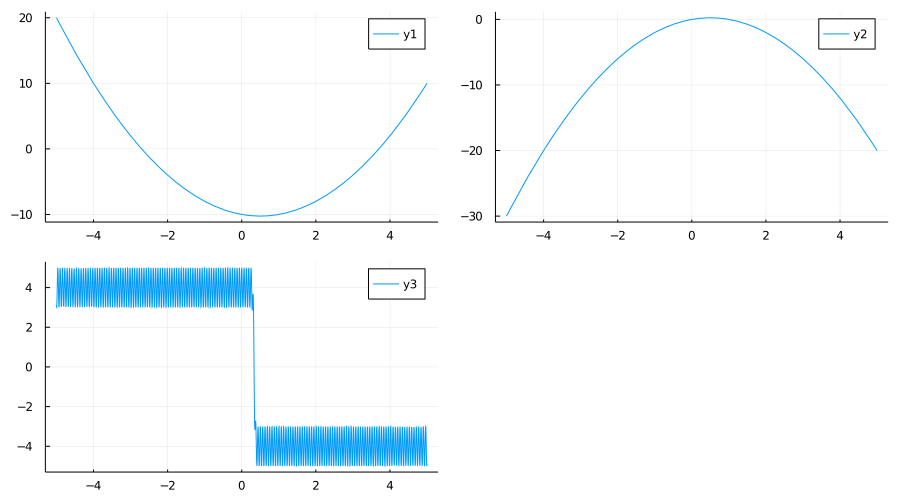

In [370]:
plot([fBisection, fNewton, fOrder2], layout = 3, size = (900,500))

In [281]:
x = find_zero(fBisect, (-10,10), Bisection(),verbose=true)
# Bisekcja nie zadziała dla przedziału którego krańce nie mają wartości funkcji o przeciwnych znakach

LoadError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



In [285]:
D(f) = x->ForwardDiff.derivative(f, float(x))
x = find_zero((fNewton, D(fNewton)), 1/2, Roots.Newton(),verbose=true)
# Newton nie działa dla tej funkcji bo wzięliśmy jako punkt startowy 1/2 gdzie pochodna jest równa zero.

Results of univariate zero finding:

* Convergence failed: Too many steps taken. 
* Algorithm Roots.Newton()

Trace:
x_0 =  0.5000000000000000,	 fx_0 =  0.2500000000000000
x_1 =  0.5000000000000000,	 fx_1 =  0.2500000000000000
x_2 =  0.5000000000000000,	 fx_2 =  0.2500000000000000
x_3 =  0.5000000000000000,	 fx_3 =  0.2500000000000000
x_4 =  0.5000000000000000,	 fx_4 =  0.2500000000000000
x_5 =  0.5000000000000000,	 fx_5 =  0.2500000000000000
x_6 =  0.5000000000000000,	 fx_6 =  0.2500000000000000
x_7 =  0.5000000000000000,	 fx_7 =  0.2500000000000000
x_8 =  0.5000000000000000,	 fx_8 =  0.2500000000000000
x_9 =  0.5000000000000000,	 fx_9 =  0.2500000000000000
x_10 =  0.5000000000000000,	 fx_10 =  0.2500000000000000
x_11 =  0.5000000000000000,	 fx_11 =  0.2500000000000000
x_12 =  0.5000000000000000,	 fx_12 =  0.2500000000000000
x_13 =  0.5000000000000000,	 fx_13 =  0.2500000000000000
x_14 =  0.5000000000000000,	 fx_14 =  0.2500000000000000
x_15 =  0.5000000000000000,	 fx_15 =  0.25000000

LoadError: Roots.ConvergenceFailed("Stopped at: xn = 0.5. Too many steps taken. ")

In [46]:
find_zero(fOrder2, 0.34, Order2(),verbose=true) 

# dla x < 0.32 && x > 0.4 nie znajdzie rozwiązania
# Co ciekawe dla 0.4 znajdzie ale dla 0.37 co jest bliżej x0 = 0.331866... już nie. 
# Steffensen sobie nie radzi z tą funkcją bo nie spełniony jest warunek -1 < f'(x_i) < 0
# https://en.wikipedia.org/wiki/Steffensen's_method#Simple_description

Results of univariate zero finding:

* Converged to: 0.3318660335745625
* Algorithm: Order2()
* iterations: 6
* function evaluations: 11
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: x_n ≈ x_{n-1}. Change of sign at xn identified. 
	Algorithm stopped early, but |f(xn)| < ϵ^(1/3), where ϵ depends on xn, rtol, and atol. 

Trace:
x_0 =  0.3400000000000000,	 fx_0 = -1.7393806316265237
x_1 =  0.3304938382062192,	 fx_1 =  0.3209353222315267
x_2 =  0.3319746125955838,	 fx_2 = -0.0253056001154137
x_3 =  0.3318663877089805,	 fx_3 = -0.0000825671922814
x_4 =  0.3318660336741350,	 fx_4 = -0.0000000232155510
x_5 =  0.3318660335745626,	 fx_5 = -0.0000000000000079
x_6 =  0.3318660335745625,	 fx_6 =  0.0000000000000071



0.3318660335745625